In [15]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

In [46]:
# calculate moving averages with a window size of n
def moving_average(data, n):
    averages = list()
    for i in range(len(data)):
        # when historical data is partially/not available
        if i-n < 0:
            average = np.mean(data[:i+1])
            
        # when getting the moving average of current time
        elif i+1 == len(data):
            average = np.mean(data[i-n:])
        
        # calculate moving average normally
        else:
            average = np.mean(data[i-n:i+1])
        averages.append(average)
    return averages

In [52]:
# load dataset
df = pd.read_csv(os.getcwd() + '/data/train.csv')

# define sales and calculate its moving averages
date = df.date
sales = df.sales
ma_sales = moving_average(sales, 5)

In [69]:
df = pd.read_csv(os.getcwd() + '/data/train.csv')
df[df['sales'] == 0] = 1

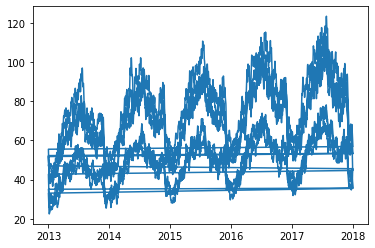

In [78]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index(df['date'])

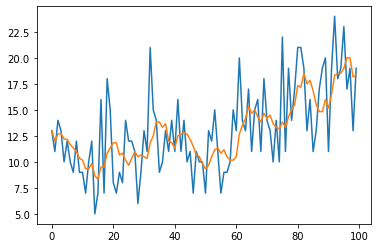

In [57]:
plt.plot(sales[:100])
plt.plot(ma_sales[:100])

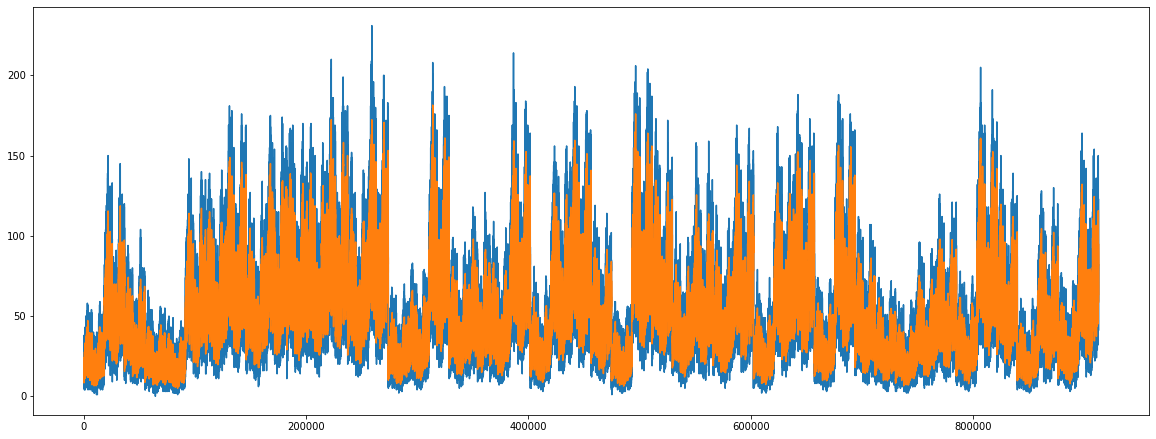

In [50]:
fig1, ax1 = plt.subplots(figsize=(20, 7.5))
ax1.plot(df.sales)
plt.plot(moving_average(df.sales, 5))